

    Load and preprocess the MNIST dataset for training an autoencoder.

    Construct a simple autoencoder model using the Keras functional API.

    Train the autoencoder on the MNIST dataset.

    Evaluate the performance of the trained autoencoder.

    Fine-tune the autoencoder to improve its performance.

    Use the autoencoder to denoise images.


**Step 1 : Data Preprocessing**

This exercise prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector.

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

#Load the dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalise the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In the above code:

    Use Keras to load the MNIST dataset.
    Normalize the image pixel values to the range [0, 1].
    Flatten the 28x28 images to a 784-dimensional vector to reshape the data.



**Step 2 : Building the Autoencoder Model**

This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss.

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Encoder
input_layer = Input(shape=(784, ))
encoded = Dense(64, activation='relu')(input_layer)

# Bottleneck
bottleneck = Dense(64, activation='relu')(encoded)

#Decoder
decoder = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoder)

# Autoencoder model
autoencoder = Model(input_layer, output_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Summary of the model
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 784)                 │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,520 (427.81 KB)

 Trainable params: 109,520 (427.81 KB)

 Non-trainable params: 0 (0.00 B)

In the above code:

1. Define the Encoder:

    Create an input layer with 784 neurons.
    Add a Dense layer with 64 neurons and ReLU activation.

2. Define the Bottleneck:

    Add a Dense layer with 32 neurons and ReLU activation.

3. Define the Decoder:

    Add a Dense layer with 64 neurons and ReLU activation.
    Add an output layer with 784 neurons and sigmoid activation.

4. Compile the Model:

    Use the Adam optimizer and binary crossentropy loss.



**Step 3 : Training the Autoencoder**

In this exercise, the autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself.

In [5]:
autoencoder.fit(
    x_train, x_train,
    epochs = 25,
    batch_size = 256,
    shuffle = True,
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.3555 - val_loss: 0.1681
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1593 - val_loss: 0.1345
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1313 - val_loss: 0.1185
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1175 - val_loss: 0.1110
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1114 - val_loss: 0.1069
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1074 - val_loss: 0.1042
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1046 - val_loss: 0.1013
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1020 - val_loss: 0.0989
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0996 - val_loss: 0.0969
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0977 - val_loss: 0.0954
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0962 - val_loss: 0.0939
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In the above code:

    Use the fit method to train the model on the training data.
    Set the number of epochs to 25 and the batch size to 256..
    Use the test data for validation.



**Step 4: Evaluating the audoencoder**

This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


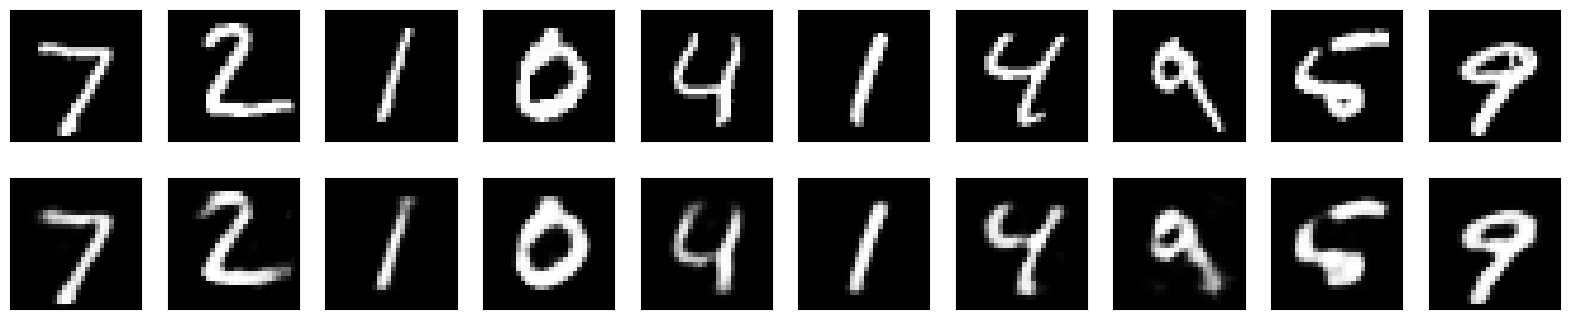

In [6]:
import matplotlib.pyplot as plt

# Predict the test data
reconstructed = autoencoder.predict(x_test)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In the above code:

1. Reconstruct Images:

    Use the autoencoder to predict the test data.
    Compare the original test images with the reconstructed images.

2. Visualize the Results:

    Plot a few examples of original and reconstructed images side by side.



**Step 5: Fine-Tuning the Autoencoder**

Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance. In this exercise, you unfreeze the last four layers and train the model again for a few more epochs.

In [7]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]:
    layer.trainable = True

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model again
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0875 - val_loss: 0.0843
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0851 - val_loss: 0.0841
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0848 - val_loss: 0.0840
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0846 - val_loss: 0.0842
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0846 - val_loss: 0.0836
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0842 - val_loss: 0.0836
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0840 - val_loss: 0.0831
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0839 - val_loss: 0.0830
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0833 - val_loss: 0.0828
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0834 - val_loss: 0.0825


In the above code:

1. Unfreeze the Encoder Layers:

    Unfreeze the last four layers of the encoder.

2. Compile and Train the Model:

    Recompile the model.
    Train the model again for 10 epochs with the same training and validation data.



**Step 6: Denoising Images with Autoencoder**

In this exercise, you add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images.

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.2423 - val_loss: 0.1448
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1428 - val_loss: 0.1340
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1333 - val_loss: 0.1285
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1284 - val_loss: 0.1253
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1253 - val_loss: 0.1230
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1233 - val_loss: 0.1212
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1217 - val_loss: 0.1202
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1207 - val_loss: 0.1195
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.1196 - val_loss: 0.1186
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1189 - val_loss: 0.1182
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1183 - val_loss: 0.1177
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

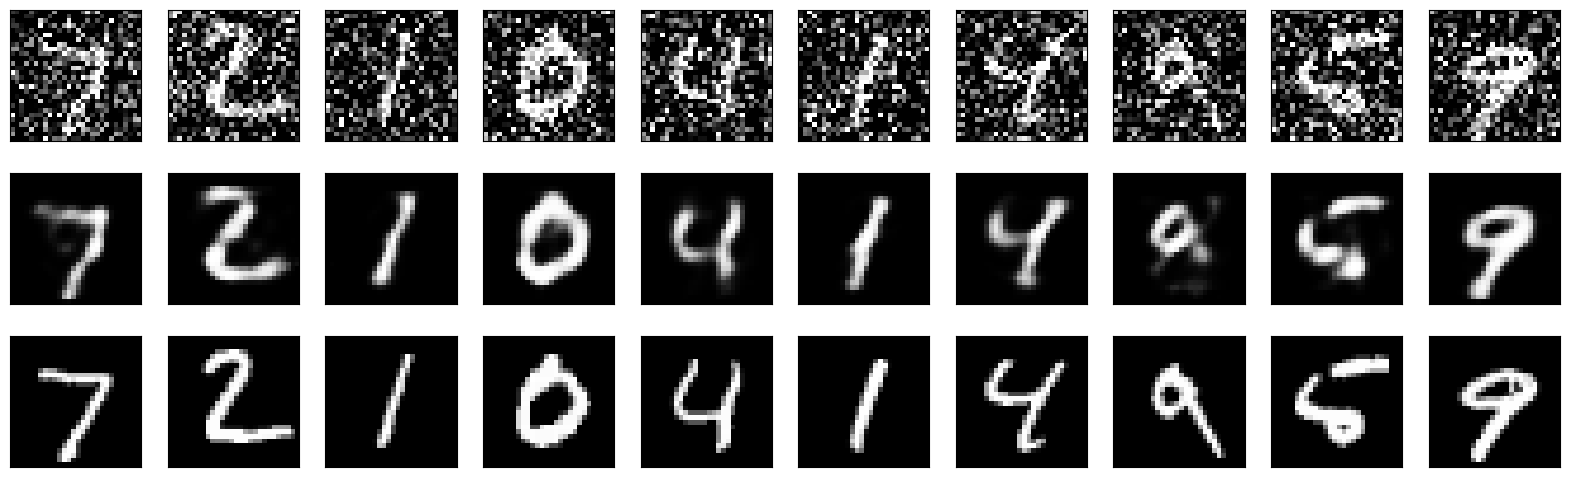

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In the above code:

1. Add noise to the data:

    Add random noise to the training and test data.
    Train the Autoencoder with noisy data: -Train the autoencoder using the noisy images as input and the original images as target.

2. Evaluate the denoising performance:

    Use the autoencoder to denoise the test images.
    Compare the noisy, denoised, and original images.

